## This notebook demonstrates how to create value added cutouts from DR2 Mosaics on the STRW cluster using the `strw_lofar_data_utils` package. In this context value added cutouts refer to cutouts that not only contain the raw iamge data but also additional information about the position of the sources within the cutout, such as pixel coordinates. This functionality is very early in development and assumes certain data structures and format specific to my project needs. It may require adjustments to work in different contexts or with different datasets - mainly the name and structure of the catalogue used to define the cutout regions.

# Import necessary libraries and modules:

In [1]:
import pandas as pd
import os

from src.pipelines import generate_cutouts

# Load the catalogue:

In [2]:
GIANTS_CATALOG = os.getcwd() + "/data/discovered_giants_catalogue.csv"
GIANTS_CATALOG

'/home/penchev/strw_lofar_data_utils/data/discovered_giants_catalogue.csv'

In [3]:
giants_df = pd.read_csv(GIANTS_CATALOG)
giants_df.head()

,recno,Name,RAJ2000,DEJ2000,LengthMpc,e_LengthMpc,LengthAng,z,e_z,Ref,FistDisc
0,10511,NaN,40.275764,8.737979,0.871,0.008,32.70,0.02121,0.00017,Oei et al. 2023,Oei et al. 2023
1,10358,NaN,38.802856,10.196330,1.014,0.607,15.60,0.05384,0.00000,Oei et al. 2023,Oei et al. 2023
2,10283,NaN,48.697044,15.149883,1.067,0.505,12.70,0.07104,0.00000,Oei et al. 2023,Oei et al. 2023
3,10938,NaN,42.945000,15.836940,0.918,0.000,2.46,0.48900,0.00000,Mahato et al. 2021,Mahato et al. 2021
4,10055,NaN,43.804028,17.514114,1.295,0.441,11.60,0.09725,0.00000,Oei et al. 2023,Oei et al. 2023


# Get the RA and Dec from the catalogue to define cutout regions:

In [4]:
# Get RA and DEC for the first 100 giants
ra_dec_list = list(
    zip(giants_df["RAJ2000"].values, giants_df["DEJ2000"].values)
)
ra_dec_list = ra_dec_list[200:300]
ra_dec_list

[(37.512507, 31.448506),
 (36.888573, 31.71221834456),
 (35.891288, 31.5848955408),
 (38.937349, 31.079878),
 (40.3895, 33.45615),
 (37.632965, 32.11713752079),
 (46.769882, 35.489632),
 (47.245789, 36.027981),
 (46.548565, 36.630931),
 (42.97561, 35.49167),
 (42.896458, 37.530243),
 (44.095464, 37.007508),
 (65.596321, 27.191444),
 (73.663273, 26.397725),
 (65.808029, 29.936095),
 (88.38070833333, 44.73536111111),
 (72.28791666667, 45.01083333333),
 (84.965454, 46.83057),
 (87.707984, 49.383221),
 (48.258125, 41.33366944444),
 (50.48229166667, 43.77799444444),
 (73.22, 52.07972222222),
 (83.232452, 55.393238),
 (77.11354166667, 60.94096666667),
 (22.9066215, 19.85199694782),
 (22.8874859, 20.38565867225),
 (23.1480203, 20.36747318794),
 (21.72001281464, 20.40894227396),
 (22.158282, 20.4579883944),
 (21.84151210368, 21.0916931923),
 (21.604315, 20.99466602205),
 (22.876428, 21.15452565814),
 (22.73447600163, 21.20225423316),
 (24.759765, 21.99083895439),
 (23.418595, 22.00686569399),


# Generate value added cutouts using the defined RA and Dec coordinates:

In [5]:
cutouts = generate_cutouts(
    ra_dec_list=ra_dec_list,
    size_pixels = 300,
    save=False,
    value_added=True,
)

Generating cutouts:  25%|██▌       | 25/100 [00:01<00:01, 40.13it/s]

No mosaic found covering RA: 46.769882, Dec: 35.489632
No mosaic found covering RA: 47.245789, Dec: 36.027981
No mosaic found covering RA: 46.548565, Dec: 36.630931
No mosaic found covering RA: 42.97561, Dec: 35.49167
No mosaic found covering RA: 42.896458, Dec: 37.530243
No mosaic found covering RA: 44.095464, Dec: 37.007508
No mosaic found covering RA: 65.596321, Dec: 27.191444
No mosaic found covering RA: 73.663273, Dec: 26.397725
No mosaic found covering RA: 65.808029, Dec: 29.936095
No mosaic found covering RA: 88.38070833333, Dec: 44.73536111111
No mosaic found covering RA: 72.28791666667, Dec: 45.01083333333
No mosaic found covering RA: 84.965454, Dec: 46.83057
No mosaic found covering RA: 87.707984, Dec: 49.383221
No mosaic found covering RA: 48.258125, Dec: 41.33366944444
No mosaic found covering RA: 50.48229166667, Dec: 43.77799444444
No mosaic found covering RA: 73.22, Dec: 52.07972222222
No mosaic found covering RA: 83.232452, Dec: 55.393238
No mosaic found covering RA: 77.

Generating cutouts: 100%|██████████| 100/100 [00:13<00:00,  7.26it/s]


In [6]:
print(f"Generated {len(cutouts)} cutouts.")

Generated 82 cutouts.


# Show the pixel coordinates of the different sources within the cutouts:

In [7]:
for example_cutout in cutouts:
    objects = example_cutout.get_objects_in_cutout()
    print(objects)

{10123: [(149, 149)]}
{3045: [(174, 159), (149, 149), (130, 160), (123, 171)]}
{6725: [(149, 152)]}
{9285: [(149, 149)]}
{9723: [(149, 149)]}
{5873: [(160, 150), (148, 149), (128, 150), (116, 140)]}
{460: [(150, 147), (148, 148)]}
{}
{3819: [(150, 145)]}
{}
{5783: [(170, 112), (152, 144), (141, 168), (139, 172)]}
{3657: [(179, 154), (149, 150), (122, 148)]}
{1240: [(174, 164), (149, 149), (90, 129)]}
{3396: [(170, 146), (168, 152), (153, 146), (129, 154), (124, 152)]}
{4346: [(152, 154)]}
{5796: [(225, 249), (204, 227), (149, 149), (130, 124), (119, 105), (112, 144), (104, 111), (100, 97)]}
{}
{}
{}
{2559: [(162, 143), (143, 151), (129, 159)]}
{1746: [(172, 161), (150, 149), (128, 140)]}
{6266: [(157, 162), (156, 166), (147, 142), (137, 116)]}
{8515: [(144, 152)]}
{9074: [(149, 148), (138, 179)]}
{6600: [(148, 149)]}
{6095: [(190, 170), (172, 152), (164, 149), (149, 149), (134, 141)]}
{9953: [(149, 146)]}
{}
{5159: [(150, 74), (148, 149), (148, 197), (144, 195)]}
{130: [(218, 188), (14

# Display one of the generated cutouts along with source pixel coordinates:

Object: 5796, Position: [(225, 249), (204, 227), (149, 149), (130, 124), (119, 105), (112, 144), (104, 111), (100, 97)]


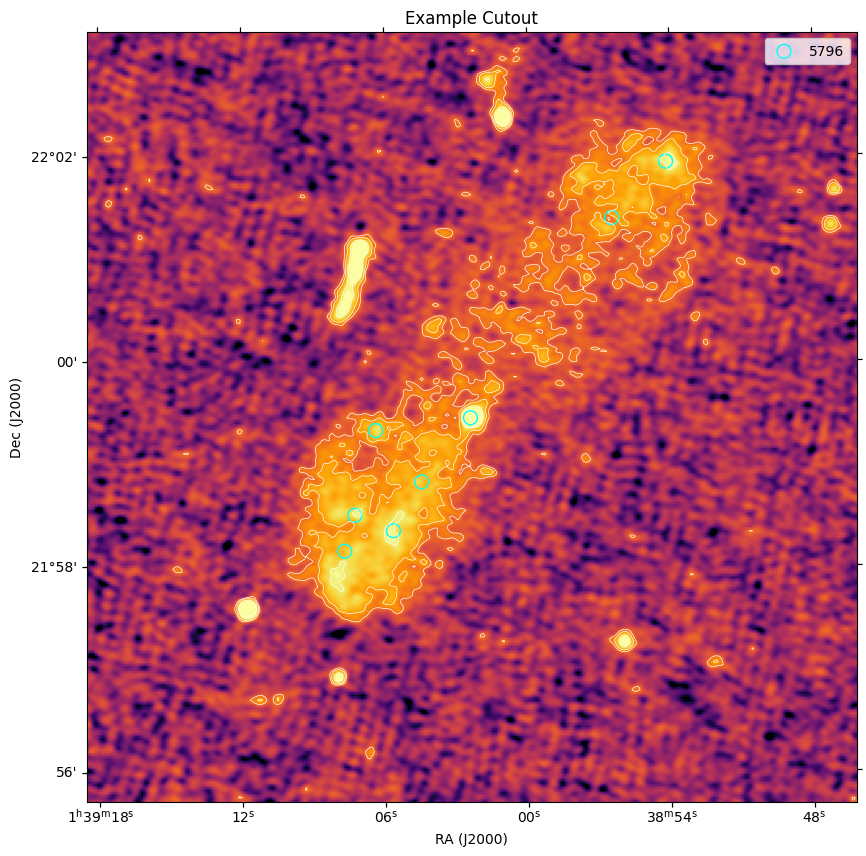

In [10]:
from copy import deepcopy

example_cutout = cutouts[15]

objects = example_cutout.get_objects_in_cutout()
for obj_name, position in objects.items():
    print(f"Object: {obj_name}, Position: {position}")

example_cutout.show_cutout(
    title="Example Cutout", 
    contour_levels=[3, 5, 10]
)